<a href="https://colab.research.google.com/github/hwarang97/hukppenhiem/blob/main/install_pytorch/Dacon_pytorch_day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 참고 사이트 

link : https://dacon.io/en/codeshare/4532

In [54]:
import torch
from torchvision import transforms, datasets, utils 
# torchvision : 이미지 데이터를 다루는 도구 모음
# transforms : 이미지 데이터셋에 쓸 수 있는 여러 변환 필터를 담은 모듈. 크기조절, 밝기, 타입변환 등등 전처리 수행 (ex. ToTensor())
# datasets : load dataset (root, train 등 설정), data_loader(dataset, batch_size, shuffle)
# utils:: 아미지 저장 및 시각화 도구 (pyplot을 대체?)

from torch.utils import data
# torch.utils.data : 데이터셋 표준 정의? 데이터셋 다루는 도구

import matplotlib.pyplot as plt
import numpy as np

In [2]:
transform = transforms.Compose([transforms.ToTensor()]) # image -> torch.tensor

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# dataset 은 편하게 데이터를 가져오게 해주는 도구
# transform은 데이터전처리 역할

trainset = datasets.FashionMNIST(
    root='./drive/MyDrive/data/',
    train=True,
    download=True,
    transform = transform
)

testset = datasets.FashionMNIST(
    root='./drive/MyDrive/data/',
    train=False,
    download=True,
    transform=transform
)

In [5]:
batch_size = 16

# data loader는 데이터셋을 다루는 도구
train_loader = data.DataLoader(
    dataset = trainset,
    batch_size = batch_size,
    shuffle = True
)

test_loader = data.DataLoader(
    dataset = testset,
    batch_size = batch_size,
    shuffle = True
)

In [6]:
trainset.classes[0]

'T-shirt/top'

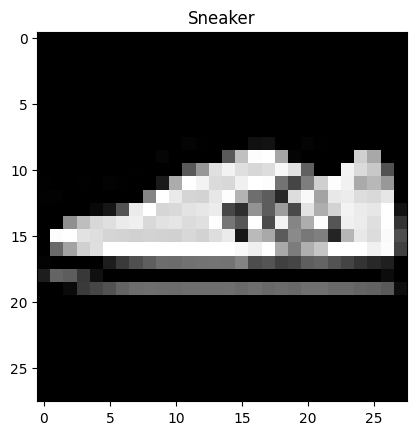

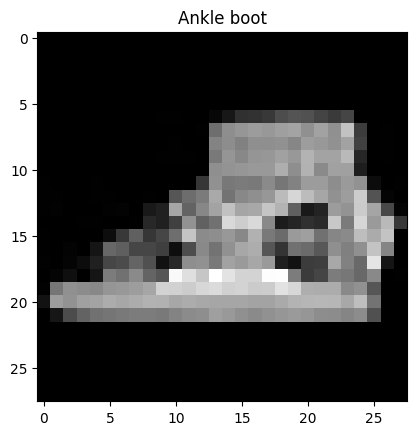

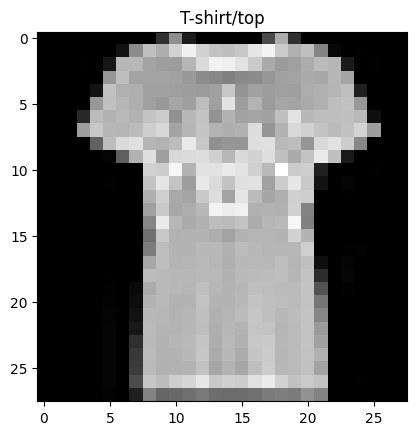

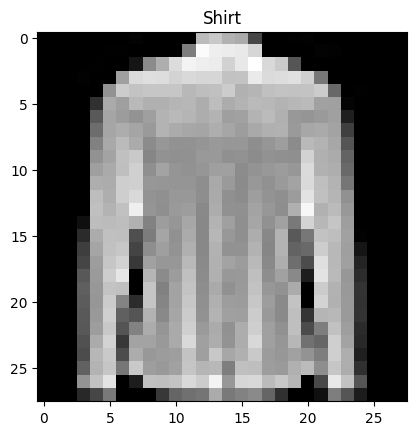

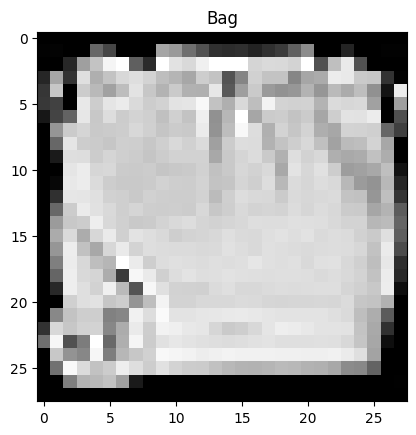

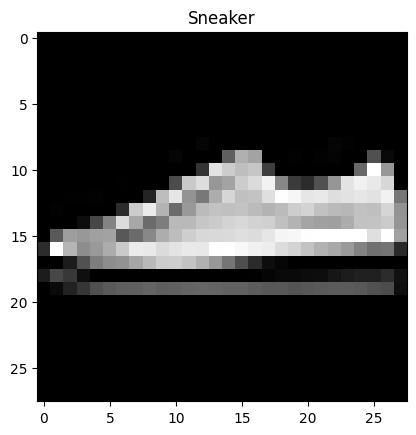

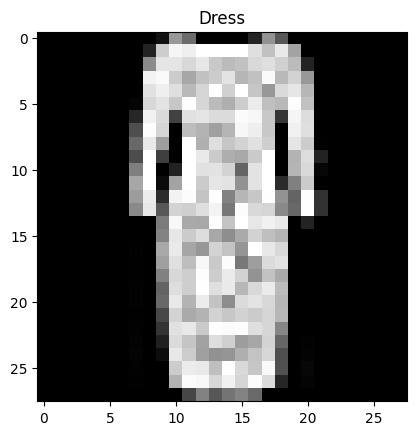

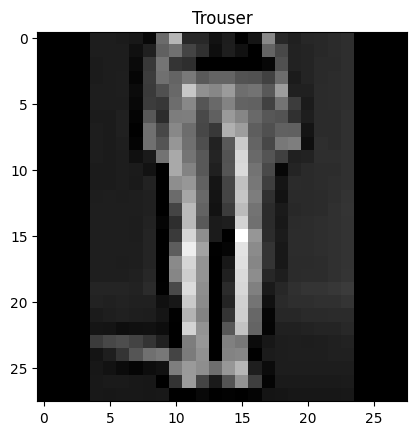

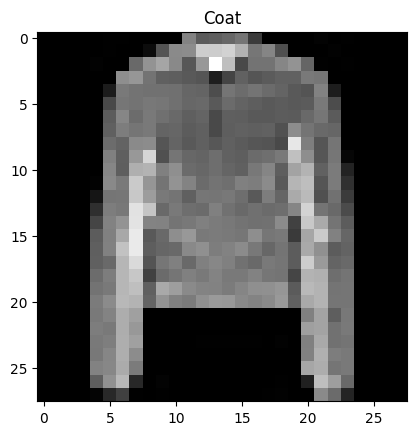

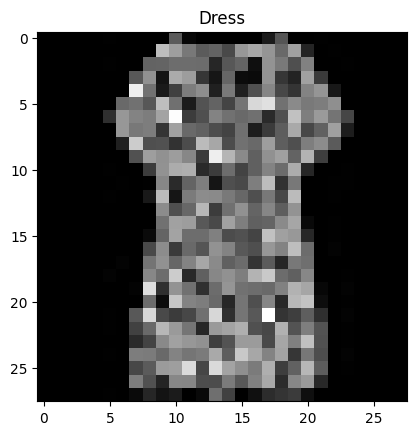

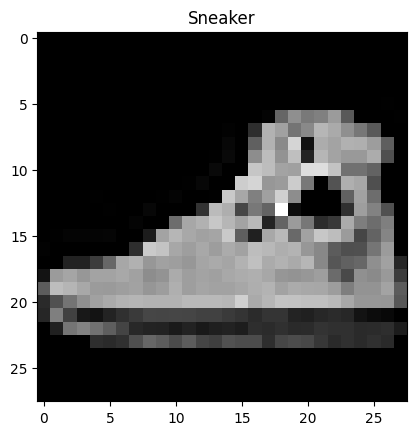

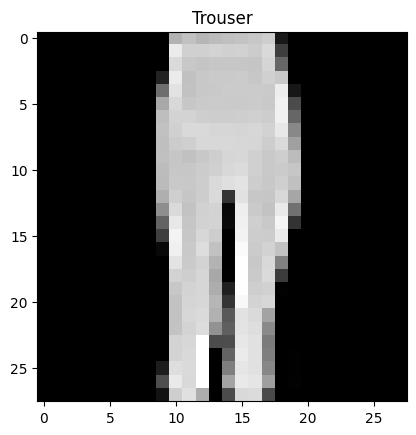

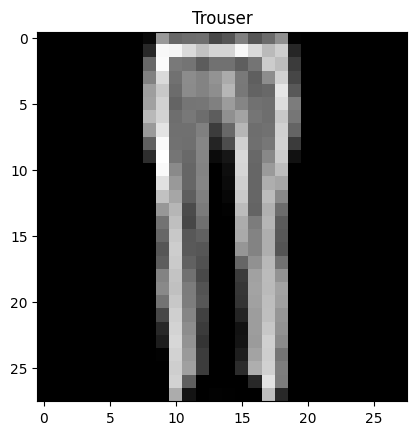

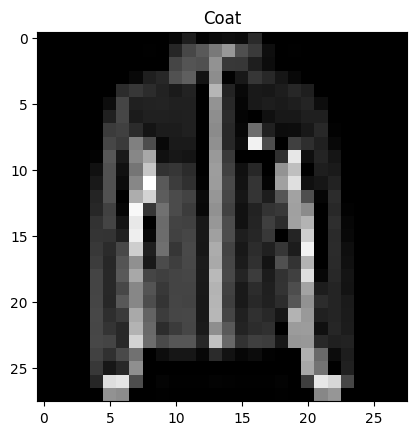

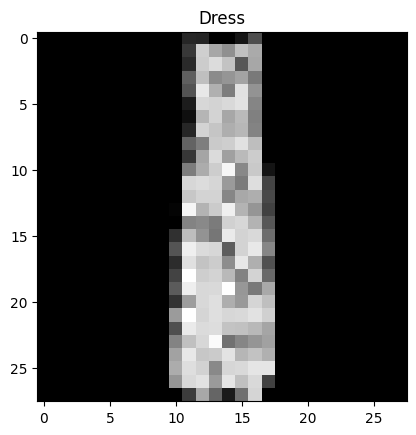

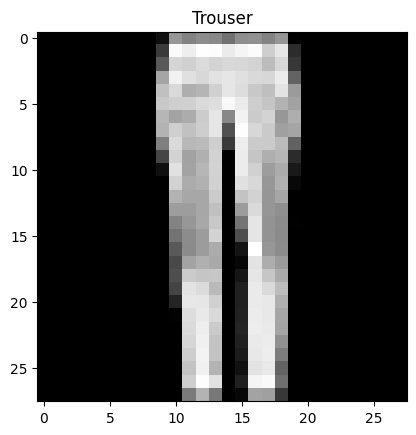

In [7]:
dataiter = iter(train_loader) # 배치를 iterator로 만들기
images, labels = next(dataiter) # 배치 1개 뽑기

# 한 배치에 들어있는 이미지와 정답을 같이 출력해주는 함수
def show_image(dataset:datasets, images:torch.tensor, labels:torch.tensor)->None:
    for i in range(len(images)):
        plt.figure()
        plt.title(dataset.classes[labels[i].item()])
        plt.imshow(images[i].squeeze(), cmap='gray') # gray로 안하면 노랑덜룩으로 나와서 바꾸는게 편함

show_image(trainset, images, labels)

In [8]:
images.shape

torch.Size([16, 1, 28, 28])

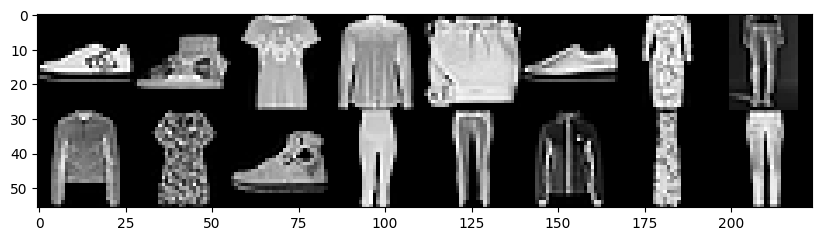

In [9]:
# 여러 이미지 모아 보기
img = utils.make_grid(images, padding=0) # 개x채x행x렬 꼴의 텐서를 입력
npimg = img.numpy() # matplotlib 와 numpy가 호환 가능(텐서는 안되는듯)
plt.figure(figsize=(10,7))
plt.imshow(np.transpose(npimg, (1,2,0))) # 원래 양식이 (채,행,렬)이므로 (행,렬,채)로 변경
# torch.transpose도 있지만, plt가 numpy와 호환이 되기에 np.transpose를 쓴걸로 예상됨
plt.show()

In [10]:
print(labels)
print(labels[0])
print(type(labels[0]))

tensor([7, 9, 0, 6, 8, 7, 3, 1, 4, 3, 7, 1, 1, 4, 3, 1])
tensor(7)
<class 'torch.Tensor'>


In [11]:
trainset.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [12]:
CLASSES = {y:x for x,y in trainset.class_to_idx.items()}
print(CLASSES)

for label in labels:
    idx = label.item() # labels가 tensor이고 label도 tensor
    print(CLASSES[idx])

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}
Sneaker
Ankle boot
T-shirt/top
Shirt
Bag
Sneaker
Dress
Trouser
Coat
Dress
Sneaker
Trouser
Trouser
Coat
Dress
Trouser


In [13]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms, datasets

In [14]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device('cuda' if USE_CUDA else 'cpu') # spellnig이 틀리지 않았나 확인
print(DEVICE)

cuda


In [15]:
EPOCHS = 30
BATCH_SIZE = 64
lr = 0.01

In [16]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear = nn.Sequential(
            nn.Linear(28*28, 16*16),
            nn.ReLU(),
            nn.Linear(16*16, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.linear(x)
        return x

In [17]:
model = Net().to(DEVICE) # GPU를 사용할 경우만 필요. CPU는 안써도됨.
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [43]:
m_dataiter = iter(train_loader) # 배치를 iterator로 만들기
m_images, m_labels = next(m_dataiter)
# print(m_images[0].squeeze().view(1,-1).shape)
a = m_images[0].squeeze().view(1,-1).to(DEVICE)
output = model(a)
print(output)
print(output.shape)
print(output.max(1, keepdim=True))
print(output.max(1, keepdim=True)[0]) # idx=0 : value
print(output.max(1, keepdim=True)[1]) # idx=1 : ind of max element
print(m_labels)
print(m_labels.shape)

tensor([[ 0.0652, -0.0128, -0.0417, -0.0430, -0.0751, -0.1113,  0.0547, -0.0086,
          0.0842, -0.0290]], device='cuda:0', grad_fn=<AddmmBackward0>)
torch.Size([1, 10])
torch.return_types.max(
values=tensor([[0.0842]], device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor([[8]], device='cuda:0'))
tensor([[0.0842]], device='cuda:0', grad_fn=<MaxBackward0>)
tensor([[8]], device='cuda:0')
tensor([1, 7, 6, 5, 0, 0, 4, 8, 8, 0, 4, 7, 2, 7, 7, 7])
torch.Size([16])


In [44]:
def train(model, train_loader, optimizer):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader): # idx에 접근하면서 각 원소에 접근
        data, target = data.to(DEVICE), target.to(DEVICE) # 각각 넣어주는꼴 (GPU를 쓸거라 변수를 옮겨줌)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0 # 정답과 예측이 맞은 수를 담는 변수. 0으로 초기화
    for data, target in test_loader:
        data, target = data.to(DEVICE), target.to(DEVICE)
        output = model(data) # output : (1,10)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # 16개에 대한 loss값들을 전부 더하기
        pred = output.max(1, keepdim=True)[1] # dim : max를 찾을 차원지정, index=1 이면 max element의 원소값 반환
        correct += pred.eq(target.view_as(pred)).sum().item() # pred : (1,1), target : (1)

    test_loss /= len(test_loader.dataset) # 전체 데이터 갯수로 나누어 평균값으로 바꿔줌
    test_accuracy = 100 * correct / len(test_loader.dataset) # 정확도를 백분율로 표시
    return test_loss, test_accuracy


## <추가 학습. print format 소수점 자리 지정하기>

♒ :.2f 이러식을 나타내면 된다


In [45]:
a = 0.3333
print(a)
print(f'a 값을 소숫점아래 2번째까지 표시하면 {a:.2f}')

0.3333
a 값을 소숫점아래 2번째까지 표시하면 0.33


In [ ]:
for epoch in range(1, EPOCHS+1):
    train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)

    print(f'[{epoch}] Test Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.2f}%')

# 오버피팅과 정규화 (Overffiting and Regularization)

- 과적합을 방지하기 위한 방법으로 여러가지가 있다
    - Dropout
    - 데이터량 늘리기
    - 모델 경량화

- 이미지는 데이터를 늘리기 위해서 augmentation을 진행한다.
    - 이미지 일부 자르기
    - 이미지 회전
    - 이미지 색상 변경
    - 이미지 대칭
    - 등등

In [63]:
# 따로 만들던걸 하나에 다 적어보기
train_loader = torch.utils.data.DataLoader(
    dataset = datasets.FashionMNIST(
        root='./drive/MyDrive/data/',
        train=True,
        download=True,
        transform = transforms.Compose([
            transforms.RandomHorizontalFlip(), # 이미지를 무작위 수평뒤집기 (무작위 = 확률적)
            transforms.ToTensor(),
            transforms.Normalize((0.1307,),(0.3081,))
        ])),
    batch_size = BATCH_SIZE,
    shuffle=True        
)

test_loader = torch.utils.data.DataLoader(
    dataset = datasets.FashionMNIST(
        root='./drive/MyDrive/data/',
        train=False,
        download=True,
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.1307,),(0.3081,))])
        ),
    batch_size = BATCH_SIZE,
    shuffle = True
)

In [62]:
# # 간단하게 작성하고 합친버전 (따로 작성해야하는게, tranform 부분도 trian, test에 따라 달라짐)

# transform = transforms.Compose([
#             transforms.RandomHorizontalFlip(), # 이미지를 무작위 수평뒤집기 (무작위 = 확률적)
#             transforms.ToTensor(),
#             transforms.Normalize((0.1307,),(0.3081,))
#         ])

# train_loader = torch.utils.data.DataLoader(
#     dataset=datasets.FashionMNIST(
#         root='./drive/MyDrive/data/',
#         train=True,
#         download=True,
#         transform = transform
#     ),
#     batch_size=BATCH_SIZE,
#     shuffle=True,
# )

# test_loader = torch.utils.data.DataLoader(
#     dataset=datasets.FashionMNIST(
#         root='./drive/MyDrive/data/',
#         train=False,
#         download=True,
#         transform = transform
#     ),
#     batch_size=BATCH_SIZE,
#     shuffle=True,
# )

In [ ]:
# 드롭아웃
class Net(nn.Module):
    def __init__(self, dropout_p=0.2): # 20% 확률로 뉴런을 사용하지 않겠다는 의미
        super().__init__()
        self.dropout_p = dropout_p
        self.linear = nn.Sequential(
            nn.Linear(28*28, 256),
            nn.ReLU(),
            F.dropout(p=dropout_p, training=self.training), # model.training=True라면 드랍아웃실행
            nn.Linear(256, 128),
            nn.ReLU(),
            F.dropout(p=dropout_p, training=self.training),
            nn.Linear(128, 10),
            nn.ReLU(),
            F.dropout(p=dropout_p, training=self.training)
        )

    def forward(self, x):
        x = self.linear(x)
        return x